## JO Barcelona 2022:

## Reto: Predecir los precios de los futbolistas de una manera precisa.
___

In [612]:
#Import the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from catboost import CatBoostRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression #Import Logistic Regression Classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier #Import KNeighbors Classifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")



In [501]:
df_train = pd.read_csv('train.csv', index_col=0)
df_train.head()

,red_card_continent,age,nation,league,team,goals_selection,selections_nation,position,price,goal_champ,...,assist_cup,own_goal_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,goal_continent,assist_continent,own_goal_continent,yellow_card_continent,second_yellow_card_continent
1019,0.0,23,Tunisia,Ligue1,OGCNice,0,4,Goalkeeper,1000000.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
1892,0.0,20,CzechRepublic,FortunaLiga,1.FKPribram,0,1,LeftWinger,100000.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,7.0,31,Canada,SuperLiga,RedStar,0,40,Goalkeeper,3000000.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,25.0
3137,0.0,22,Belgium,JupilerProLeague,ClubBrugge,4,18,SecondStriker,4000000.0,33.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2576,0.0,29,Ukraine,PremierLiga,Chornomorets,0,0,LeftMidfield,500000.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [618]:
df_train.price.describe()

count    8.897000e+03
mean     1.708305e+06
std      6.765265e+06
min      2.000000e+04
25%      1.000000e+05
50%      3.000000e+05
75%      8.000000e+05
max      1.800000e+08
Name: price, dtype: float64

In [592]:
#Algunas estadísticas de nuestro DataSet
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
red_card_continent,8897.0,2.498595e-01,1.860633e+00,0.0,0.0,0.0,0.0,59.0
age,8897.0,2.605249e+01,4.561708e+00,16.0,23.0,26.0,29.0,46.0
goals_selection,8897.0,5.997527e-01,2.642642e+00,0.0,0.0,0.0,0.0,85.0
selections_nation,8897.0,5.787794e+00,1.498991e+01,0.0,0.0,0.0,4.0,176.0
price,8897.0,1.708305e+06,6.765265e+06,20000.0,100000.0,300000.0,800000.0,180000000.0
goal_champ,8897.0,1.168967e+01,1.882085e+01,0.0,0.0,4.0,16.0,423.0
assist_champ,8897.0,9.137574e+00,1.509761e+01,0.0,0.0,3.0,12.0,174.0
own_goal_champ,8897.0,9.902214e-02,3.613775e-01,0.0,0.0,0.0,0.0,6.0
yellow_card_champ,8897.0,1.480645e+01,1.782819e+01,0.0,2.0,9.0,21.0,142.0
second_yellow_card_champ,8897.0,4.251995e-01,9.188321e-01,0.0,0.0,0.0,1.0,9.0


In [503]:
#Counting the nulls values:
df_train.isnull().sum()

red_card_continent              0
age                             0
nation                          0
league                          0
team                            0
goals_selection                 0
selections_nation               0
position                        0
price                           0
goal_champ                      0
assist_champ                    0
own_goal_champ                  0
yellow_card_champ               0
second_yellow_card_champ        0
red_card_champ                  0
goal_cup                        0
assist_cup                      0
own_goal_cup                    0
yellow_card_cup                 0
second_yellow_card_cup          0
red_card_cup                    0
goal_continent                  0
assist_continent                0
own_goal_continent              0
yellow_card_continent           0
second_yellow_card_continent    0
dtype: int64

In [504]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8897 entries, 1019 to 10368
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   red_card_continent            8897 non-null   float64
 1   age                           8897 non-null   int64  
 2   nation                        8897 non-null   object 
 3   league                        8897 non-null   object 
 4   team                          8897 non-null   object 
 5   goals_selection               8897 non-null   int64  
 6   selections_nation             8897 non-null   int64  
 7   position                      8897 non-null   object 
 8   price                         8897 non-null   float64
 9   goal_champ                    8897 non-null   float64
 10  assist_champ                  8897 non-null   float64
 11  own_goal_champ                8897 non-null   float64
 12  yellow_card_champ             8897 non-null   float64
 13 

In [505]:
df_train['team'].unique()

array(['OGCNice', '1.FKPribram', 'RedStar', ..., 'RacingBeirut',
       'QuangNamFC', 'FCSionU21'], dtype=object)

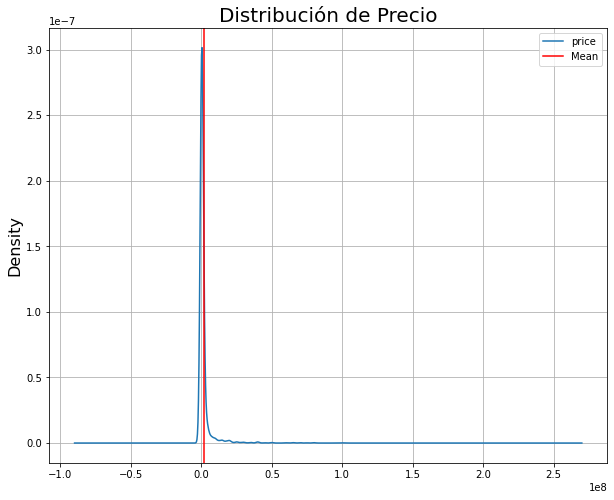

In [600]:
plt.figure(figsize=(10,8))
df_train['price'].plot.kde()
plt.title("Distribución de Precio",  fontsize=20)
plt.xlabel("", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()

plt.axvline(x=df_train.price.mean(), color='red', label='Mean')
plt.legend()
plt.show()

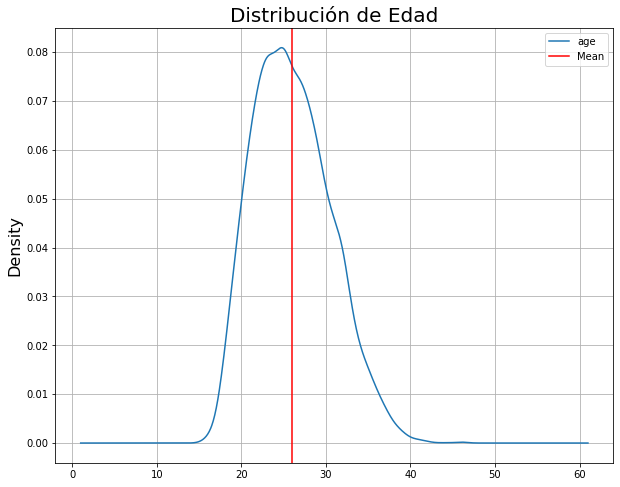

In [610]:
plt.figure(figsize=(10,8))
df_train['age'].plot.kde()
plt.title("Distribución de Edad",  fontsize=20)
plt.xlabel("", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()

plt.axvline(x=df_train.age.mean(), color='red', label='Mean')
plt.legend()
plt.show()

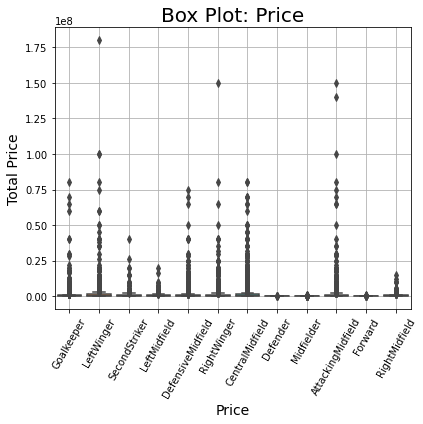

In [608]:
#Boxplot

fig = plt.figure(figsize=(6,6))


sns.boxplot(x=df_train.position, y=df_train.price)

#setting others parameters
plt.title('Box Plot: Price', fontsize=20)
plt.xlabel("Price",fontsize=14)
plt.ylabel("Total Price", fontsize= 14)
plt.xticks(rotation=60)

plt.grid()
plt.tight_layout()
plt.show()

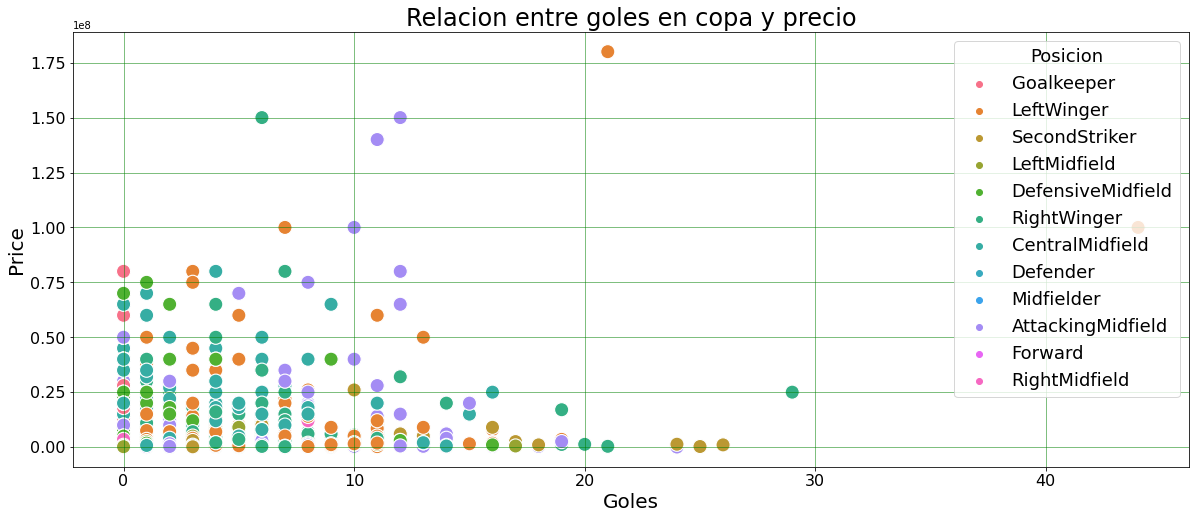

In [606]:
# Lest set the size of the figure
plt.figure(figsize =(20, 8))

#Choosing the type of chart
sns.scatterplot(data=df_train, x='goal_cup', y='price',  hue="position", s=200)

#Set title, labels, etc.

plt.title("Relacion entre goles en copa y precio",fontsize=24)
plt.xlabel("Goles", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.legend(title="Posicion", title_fontsize=18, fontsize=18, loc="best")

#plt.savefig('Scatterplot.png')
plt.show()

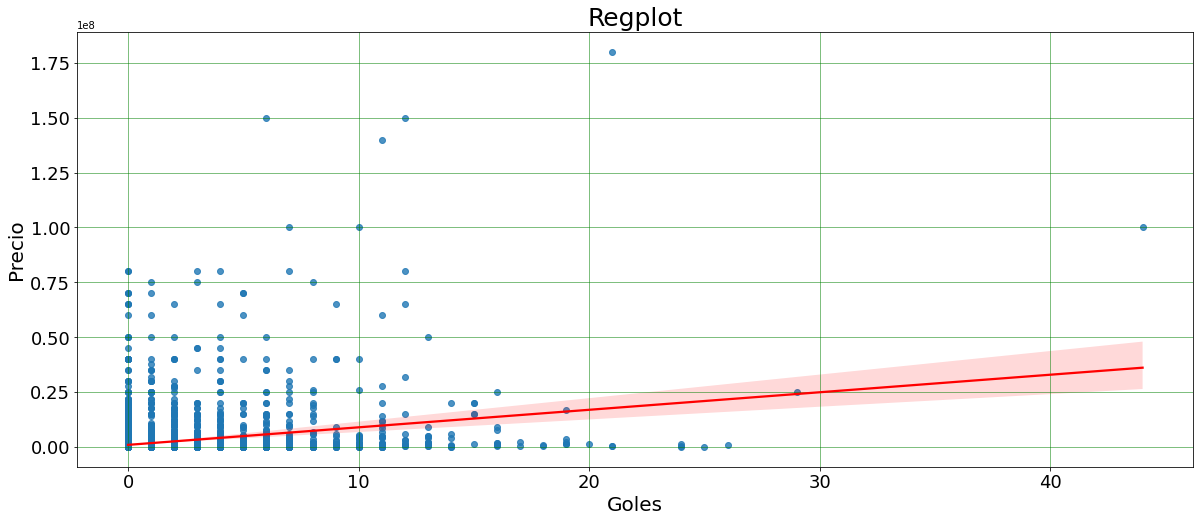

In [611]:
#Setting the size of the chart
plt.figure(figsize =(20, 8))

#Setting the type of chart
sns.regplot(data=df_train, x='goal_cup', y='price', fit_reg=True, line_kws=dict(color="red"))

#Setting others parameters
plt.title("Regplot",fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Goles", fontsize=20)
plt.ylabel("Precio", fontsize=20)

plt.grid(color='g', linestyle='-', linewidth=0.5)



plt.show()

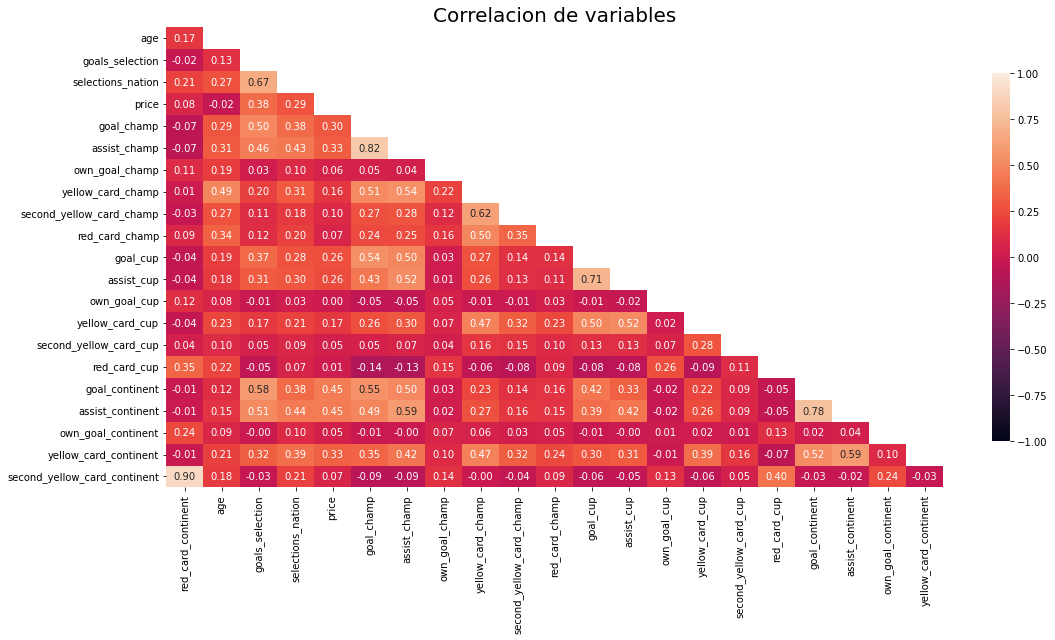

In [576]:
#Dataframe con nuestra correlacion:
correlation= df_train.corr()
#Lets plot a HeatMap:
np.ones_like(correlation, dtype=bool)
mask = np.triu(np.ones_like(correlation, dtype=bool))
correlation
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(correlation, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = correlation.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Correlacion de variables",  fontsize=20)
plt.tight_layout()
plt.show()

____

## Dividimos el Dataset:

In [553]:
#Dividimos el Dataset en dos variables X e Y, y quitamos las variable target.

X = df_train.drop(['price'], axis= 1)
y = df_train['price']

print(X.shape)
print(y.shape)

(8897, 25)
(8897,)


In [510]:
#DataFrame con valores numericos.
df_train_num = df_train.select_dtypes(include=['float64', 'int'])

In [572]:
#Dividimos el dataset en dos Train and Test con la libreria de Sklearn para entrenar nuestro modelo y luego evaluarlo:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

___

In [577]:
#Pipeline parametros
pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('scaler',
                                                     RobustScaler(with_centering=False))]),
                                    ['red_card_continent', 'age',
                                     'goals_selection', 'selections_nation',
                                     'goal_champ', 'assist_champ',
                                     'own_goal_champ', 'yellow_card_champ',
                                     'second_yellow_card_champ', 'red_card_champ',
                                     'goal_cup', 'assist_cup', 'own_goal_cup',
                                     'yellow_card_cup', 'second_yellow_card_cup',
                                     'red_card_cup', 'goal_continent',
                                     'assist_continent', 'own_goal_continent',
                          

## CatBoost Regressor:

In [613]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler(with_centering=False))]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline

#Modificamos algunos parametros y hacemos las pruebas para averiguar la mejor combinación.:


pipe = Pipeline([('preprocessing', preprocessor),
                ('data_scaling',numeric_transformer),
                ('model', CatBoostRegressor())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)



#Predict the results:
pipe_pred=pipe.predict(X_test)
pipe_pred

#Evaluate the model:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pipe_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pipe_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pipe_pred)))
r2_pipe = pipe.score(X_test,y_test)
print('R2: ', r2_pipe)


Learning rate set to 0.054661
0:	learn: 6632111.4695080	total: 196ms	remaining: 3m 15s
1:	learn: 6515764.3207589	total: 211ms	remaining: 1m 45s
2:	learn: 6402927.4992485	total: 219ms	remaining: 1m 12s
3:	learn: 6323394.5502488	total: 244ms	remaining: 1m
4:	learn: 6236436.3591558	total: 252ms	remaining: 50.1s
5:	learn: 6125619.4388986	total: 277ms	remaining: 45.9s
6:	learn: 6064683.9109260	total: 289ms	remaining: 40.9s
7:	learn: 5984045.3058800	total: 325ms	remaining: 40.3s
8:	learn: 5916255.5490387	total: 361ms	remaining: 39.7s
9:	learn: 5831476.6778029	total: 375ms	remaining: 37.1s
10:	learn: 5747545.0063280	total: 398ms	remaining: 35.8s
11:	learn: 5690098.7895879	total: 420ms	remaining: 34.6s
12:	learn: 5646585.6720728	total: 482ms	remaining: 36.6s
13:	learn: 5597436.0654503	total: 510ms	remaining: 35.9s
14:	learn: 5535045.5671712	total: 516ms	remaining: 33.9s
15:	learn: 5500779.8451196	total: 545ms	remaining: 33.5s
16:	learn: 5458806.1477882	total: 562ms	remaining: 32.5s
17:	learn: 

In [590]:
# Cross Validation
pipe_cv = cross_val_score(pipe,X,y,cv=10) 

# Promedio de los 5 mejores valores
print(pipe_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(pipe_cv)))

[0.33100118 0.44585727 0.41096031 0.6108462  0.58242772 0.60427688
 0.57871927 0.55214103 0.42224781 0.48994251]
Average 5-Fold CV Score: 0.5028420174541985


In [614]:
#Plot the values:

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': pipe_pred.round(1)})
df_pred.head()

,Actual,Predicted
10347,1250000.0,677454.4
2505,100000.0,41325.7
7500,250000.0,63664.0
11212,25000.0,80908.7
416,150000.0,104965.5


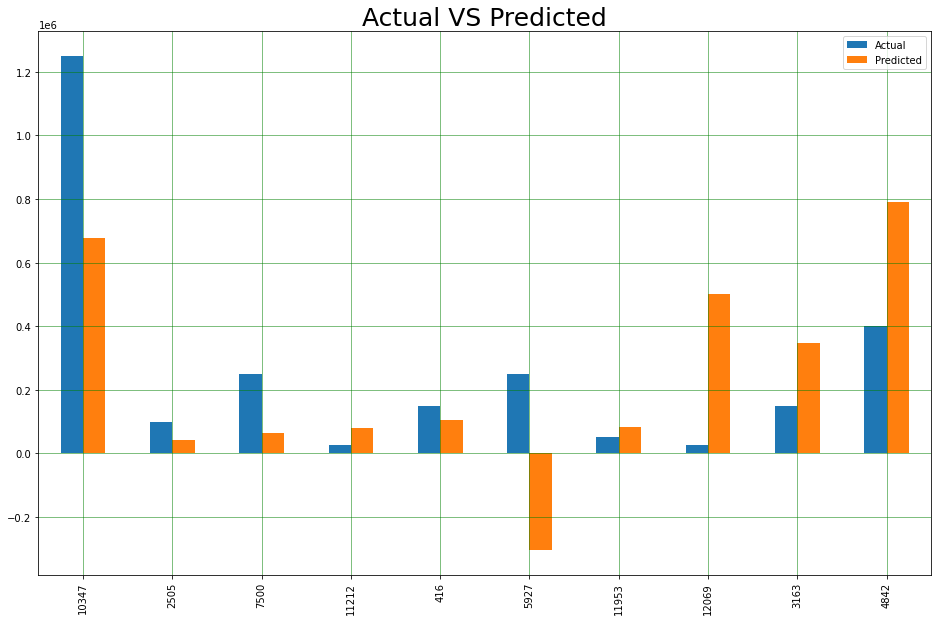

In [615]:
data = df_pred.head(10)
data.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted', fontsize=25)
plt.show()

___

___

## Comparamos los valores obtenidos:

In [616]:
# assign data of lists.  
datos = {'R^2':[r2_pipe], 'MSE':[metrics.mean_squared_error(y_test, pipe_pred)], 'MAE': [metrics.mean_absolute_error(y_test, pipe_pred)], 'RMSE': np.sqrt(metrics.mean_squared_error(y_test, pipe_pred))}  
  
# Creates pandas DataFrame.  
df_compare = pd.DataFrame(datos, index =['RandomForestRegressor'])  
  
# print the dataframe
df_compare

,R^2,MSE,MAE,RMSE
RandomForestRegressor,0.637703,1.690931e+13,1.204632e+06,4.112093e+06


___